Course: <span style="color:crimson"> Current and Future Trends in Extreme Weather </span> (EAS-G574 - Indiana University - Fall 2022) <br />
Instructor: <span style="color:crimson"> Prof. Travis O'Brien </span> <br />
Student: Trung Nguyen
<p style="text-align: center;">
<span style="color:blue; font-size:1.5em"> GRAD Homework 2 (RE-DO) </span> <br />
<span style="color:black; font-size:1.5em"> Non-stationary GEV Distributions </span> <br />
Due: Mon Oct 17, 2022 11:29 am <br />
</p>

<span style="color:crimson; font-size:1.5em"> **Notice :** Please see the RED notes below for the corrections from the previous submission.</span> <br />

<span style="color:blue; font-size:1.5em"> **1. Getting set up** (0 points)  </span>  <br />
* Create this notebook

<span style="color:blue; font-size:1.5em"> **2. Implement your own GEV PDF and CDF functions** (10 points)  </span>  <br />
* In the notebook, write two functions and verify their correctness: a function for the GEV PDF and a function for the GEV CDF. <br />
* Make some plots of GEV PDFs and CDFs using your functions. <br />
* Use the markdown cell feature to discuss the steps you took to verify that these functions are implemented correctly. <br />

<span style="color:crimson; font-size:1.5em"> **Feedback from Prof. Travis O'Brien :** </span>  <br />

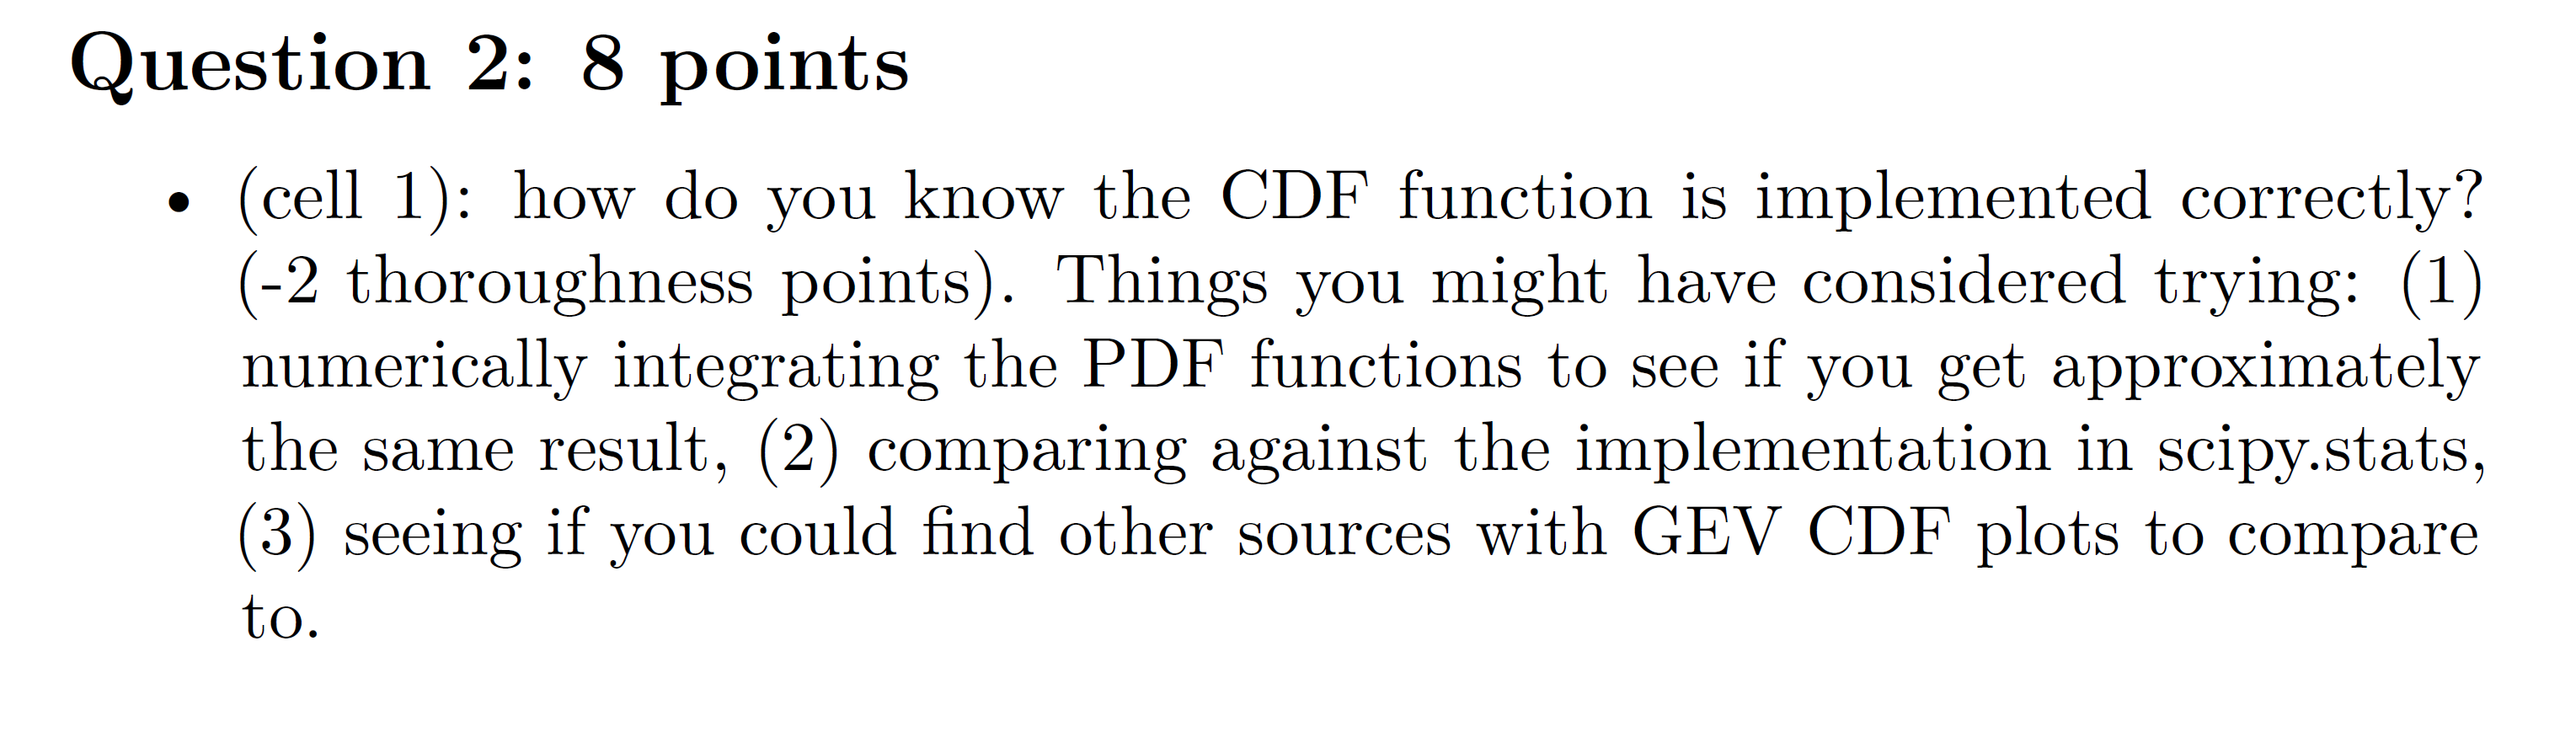

In [1]:
from IPython import display
display.Image("./q2.png")

<span style="color:crimson; font-size:1.5em"> **Corrections of this question :** </span>  <br />
 * Can be found in <span style="color:crimson; font-size:1.5em"> cell #3 </span> and the following markdown notes (i.e., for comments of Figure 3, 4, 5 and 6)
 * In detail, all three suggestion methods were used to verify the correctness of the CDF function including
     * Calculating numerical derivative of the CDF functions to see if I get approximately the same result as PDF functions
     * Comparing against the implementation in scipy.stats.genextreme
     * Compare GEV CDF plots by NCL extval_1.ncl at https://www.ncl.ucar.edu/Applications/Images/extval_1_lg.png

Special case (x=mu) : cdf F(s,xi) =  0.36787944117144233


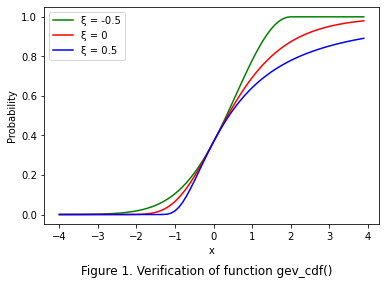

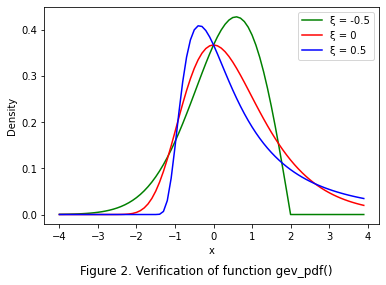

In [2]:
# ========== FOR GRAD HOMEWORK 3 ========== #
# Import my GEV libraries
#
import gev_functions

#
# Import packages for using "low-level math" and visualizations
#
import numpy as np
import matplotlib.pyplot as plt

# These two functions are moved to gev_functions.py
# 1. A function for the GEV CDF
# 2. A function for the GEV PDF

#
# Main part (i.e., make some plots and verify the written functions)
#            
if __name__=="__main__":

    # Some parameters
    mu = 0        # Location parameter
    sigma = 1     # Scale parameter
    xi = -0.5     # Shape parameter
    
    # X-array
    x = np.arange(-4, 4, 0.1)

    # Special case when x = mu 
    c = gev_functions.gev_cdf(mu, mu, sigma, xi)
    print ("Special case (x=mu) : cdf F(s,xi) = ", c)

    # Test a range of shape parameter
    xi_r = [ -0.5, 0, 0.5]
    # Colors to use
    colors=["g","r","b"]
    
    # Plot CDF with three values of xi : 
    for i in np.arange(len(xi_r)) :
        # Get the CDF
        cdf = gev_functions.gev_cdf(x, mu, sigma, xi_r[i])
        lb = '\u03BE = '+str(xi_r[i])
        # Plotting
        plt.plot(x, cdf, c=colors[i], label=lb)
    
    # Decoration
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend()
    caption='Figure 1. Verification of function gev_cdf()'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # Plot PDF with three values of xi : 
    for i in np.arange(len(xi_r)) :
        # Get the PDF
        pdf = gev_functions.gev_pdf(x, mu, sigma, xi_r[i])
        lb = '\u03BE = '+str(xi_r[i])
        # Plotting
        plt.plot(x, pdf, c=colors[i], label=lb)
    
    # Decoration
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    caption='Figure 2. Verification of function gev_pdf()'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

**Verification for the function of GEV PDF:** <br />
Using the same set of parameters as in Figure 1, **Figure 2** presents the output plotting of **gev_pdf()** functions.
This figure duplicated exactly the example Figure in Wikipedia reference [1] for the probability density function of generalized extreme value (GEV) distribution.
The lower end-point when $\xi$ > 0. (i.e., blue line) and upper end-point when $\xi$ < 0. (i.e., green line), as mentioned above through Figure 1, can also be seen.
The density is zero outside of the relevant range.
In the case $\xi = 0$ ,the density is positive on the whole real line.

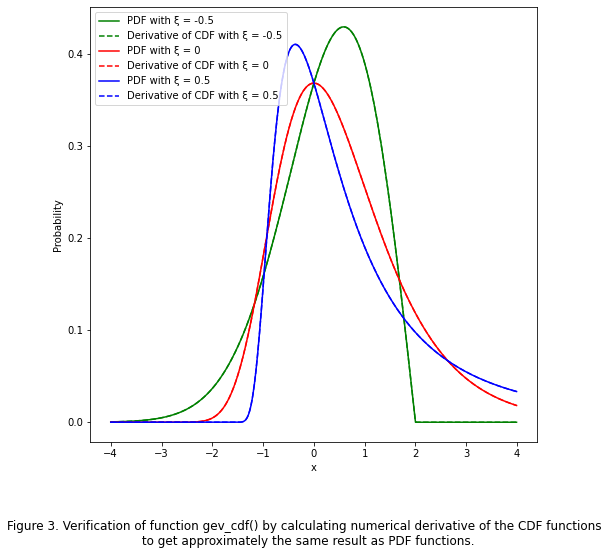

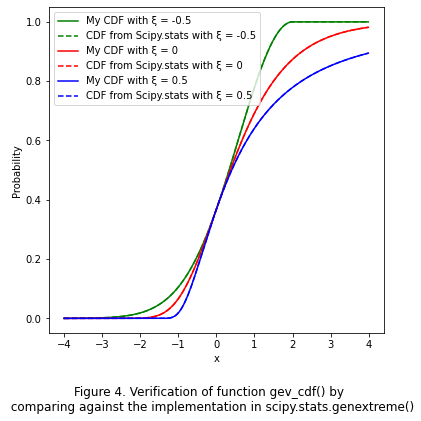

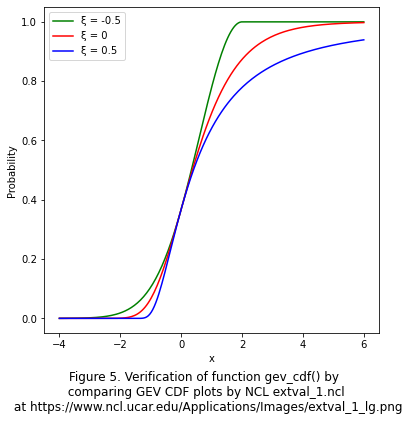

In [3]:
# "RE-DO" section for question #2
#
# What to do: Verification for the function of GEV CDF
#
# 1. What I tried in the previous version (see cell #2) 
#     a. Plot CDF with  x = np.arange(-4, 4, 0.1) to see the values 
#                                     at lower-end/upper-end points
#     b. Show the specical case: F≈0.368 when x=mu
#
# 2. What I tried in this version :
#     a. Calculating numerical derivative of the CDF functions 
#        to see if I get approximately the same result as PDF functions
#     b. Comparing against the implementation in scipy.stats.genextreme
#     c. Compare GEV CDF plots by NCL extval_1.ncl 
#        at https://www.ncl.ucar.edu/Applications/Images/extval_1_lg.png
#

# Importing "genextreme" for 2.b
from scipy.stats import genextreme

if __name__=="__main__":

    # Some parameters
    mu = 0        # Location parameter
    sigma = 1     # Scale parameter
    xi = -0.5     # Shape parameter
    
    # X-array
    x = np.arange(-4, 4, 0.01)

    # Test a range of shape parameter
    xi_r = [ -0.5, 0, 0.5]
    # Colors to use
    colors=["g","r","b"]
    
    # Adjusting figure size
    fig = plt.figure(figsize=(8,8))
    
    # Examining with three values of xi : 
    for i in np.arange(len(xi_r)) :
        # Get the PDF using written function
        pdf = gev_functions.gev_pdf(x, mu, sigma, xi_r[i])
        lb = 'PDF with \u03BE = '+str(xi_r[i])
        # Plotting PDF
        plt.plot(x, pdf, c=colors[i], label=lb)
        
        # Get the CDF using written function
        cdf = gev_functions.gev_cdf(x, mu, sigma, xi_r[i])
        lb = 'Derivative of CDF with \u03BE = '+str(xi_r[i])
        
        # 2.a Numerically derivative of CDF to see if it's the same as PDF
        dx = x[1]-x[0]
        deriv = np.gradient(cdf, dx)    
        plt.plot(x, deriv, c=colors[i], label=lb, linestyle='--')
        
    # Decoration
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend(loc='upper left')
    caption='Figure 3. Verification of function gev_cdf() by calculating numerical derivative of the CDF functions \n to get approximately the same result as PDF functions.'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # Adjusting figure size
    fig = plt.figure(figsize=(6,6))
    
    # Examining with three values of xi : 
    for i in np.arange(len(xi_r)) :
        # Get the CDF using written function
        cdf = gev_functions.gev_cdf(x, mu, sigma, xi_r[i])
        lb = 'My CDF with \u03BE = '+str(xi_r[i])
        # Plotting CDF
        plt.plot(x, cdf, c=colors[i], label=lb)
        
        # 2.b Get the CDF using scipy.stats.genextreme
        cdf_scipy = genextreme.cdf(x, -1*xi_r[i], loc=mu, scale=sigma)
        lb = 'CDF from Scipy.stats with \u03BE = '+str(xi_r[i])
        # Plotting CDF
        plt.plot(x, cdf_scipy, c=colors[i], label=lb, linestyle='--')
        
    # Decoration
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend(loc='upper left')
    caption='Figure 4. Verification of function gev_cdf() by \n comparing against the implementation in scipy.stats.genextreme()'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    
    # X-array same as https://www.ncl.ucar.edu/Applications/Scripts/extval_1.ncl
    x = np.linspace(-4, 6, 200)

    # Test a range of shape parameter same as https://www.ncl.ucar.edu/Applications/Scripts/extval_1.ncl
    xi_r = [ -0.5, 0, 0.5]
    # Colors to use
    colors=["g","r","b"]
    
    # Adjusting figure size
    fig = plt.figure(figsize=(6,6))
    
    # Examining with three values of xi : 
    for i in np.arange(len(xi_r)) :
        # Get the CDF using written function
        cdf = gev_functions.gev_cdf(x, mu, sigma, xi_r[i])
        lb = '\u03BE = '+str(xi_r[i])
        # Plotting CDF
        plt.plot(x, cdf, c=colors[i], label=lb)
        
    # Decoration
    plt.xlabel('x')
    plt.ylabel('Probability')
    plt.legend(loc='upper left')
    caption='Figure 5. Verification of function gev_cdf() by \n comparing GEV CDF plots by NCL extval_1.ncl \n at https://www.ncl.ucar.edu/Applications/Images/extval_1_lg.png'
    plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

**Verification for the function of GEV CDF:** <br />
<span style="color:crimson; font-size:1.1em"> **Previous version :** </span>  <br />
**Figure 1** presents the output plotting of **gev_cdf()** functions with three shape parameters ($\xi$) of -0.5, 0.0 and 0.5 using the same location parameter ($\mu$) of 0 and scale parameter ($\sigma$) of 1.
For this figure, the simple example provided in Wikipedia reference [1] is considered (i.e., with x from -4 to 4).
In the first case, -1/$\xi$ is the negative or $\xi$ > 0. (i.e., blue line), lower end-point can be seen where F($x,\mu$,$\sigma$,$\xi$) is 0 at $x = \mu - \sigma / \xi = -2$.
In the second case, -1/$\xi$ is the positive or $\xi$ < 0. (i.e., green line), upper end-point can be detected where F($x,\mu$,$\sigma$,$\xi$) is 1 at $x = \mu - \sigma / \xi = 2$. <span style="color:blue; font-size:1.em">
In the special case of $x = \mu$, so $F(x,\mu,\sigma,\xi) =\exp(-1) ≈ 0.368$ for whatever values of $\xi$ and $\sigma$ is also checked and printed out as above. </span> <br />
<span style="color:crimson; font-size:1.1em"> **Improvements in this version :** </span>  <br />
**Figure 3** shows that the numerical derivatives of the my GEV CDF function are the same as PDF functions for all three tested values of $\xi$.
**Figure 4** highlights that the output from my GEV CDF function are the same as the output implementing scipy.stats.genextreme.
Finally, comparing **Figure 5** and **Figure 6**, we can see that my GEV CDF function can create the same CDF plots as the NCL script called extval_1.ncl shown at https://www.ncl.ucar.edu/Applications/Images/extval_1_lg.png.

![Figure 6](https://www.ncl.ucar.edu/Applications/Images/extval_1_lg.png)
<p style="text-align: center;">
Figure 6. GEV PDF and CDF plots by NCL extval_1.ncl retrieved from https://www.ncl.ucar.edu/Applications/Images/extval_1_lg.png
</p>

<span style="color:blue; font-size:1.5em"> **3. Invert the CDF to get the quantile function** (10 points)  </span>  <br />
* Analytically invert the GEV CDF to solve for x to determine the quantile function. Specifically if q ≡ GEV(x) then solve for $x = Q(q) ≡ GEV^{−1}(q)$. The quantile function Q gives the value of x corresponding to quantile q. Demonstrate that your solution is correct. <br />

<span style="color:crimson; font-size:1.5em"> **Feedback from Prof. Travis O'Brien :** </span>  <br />

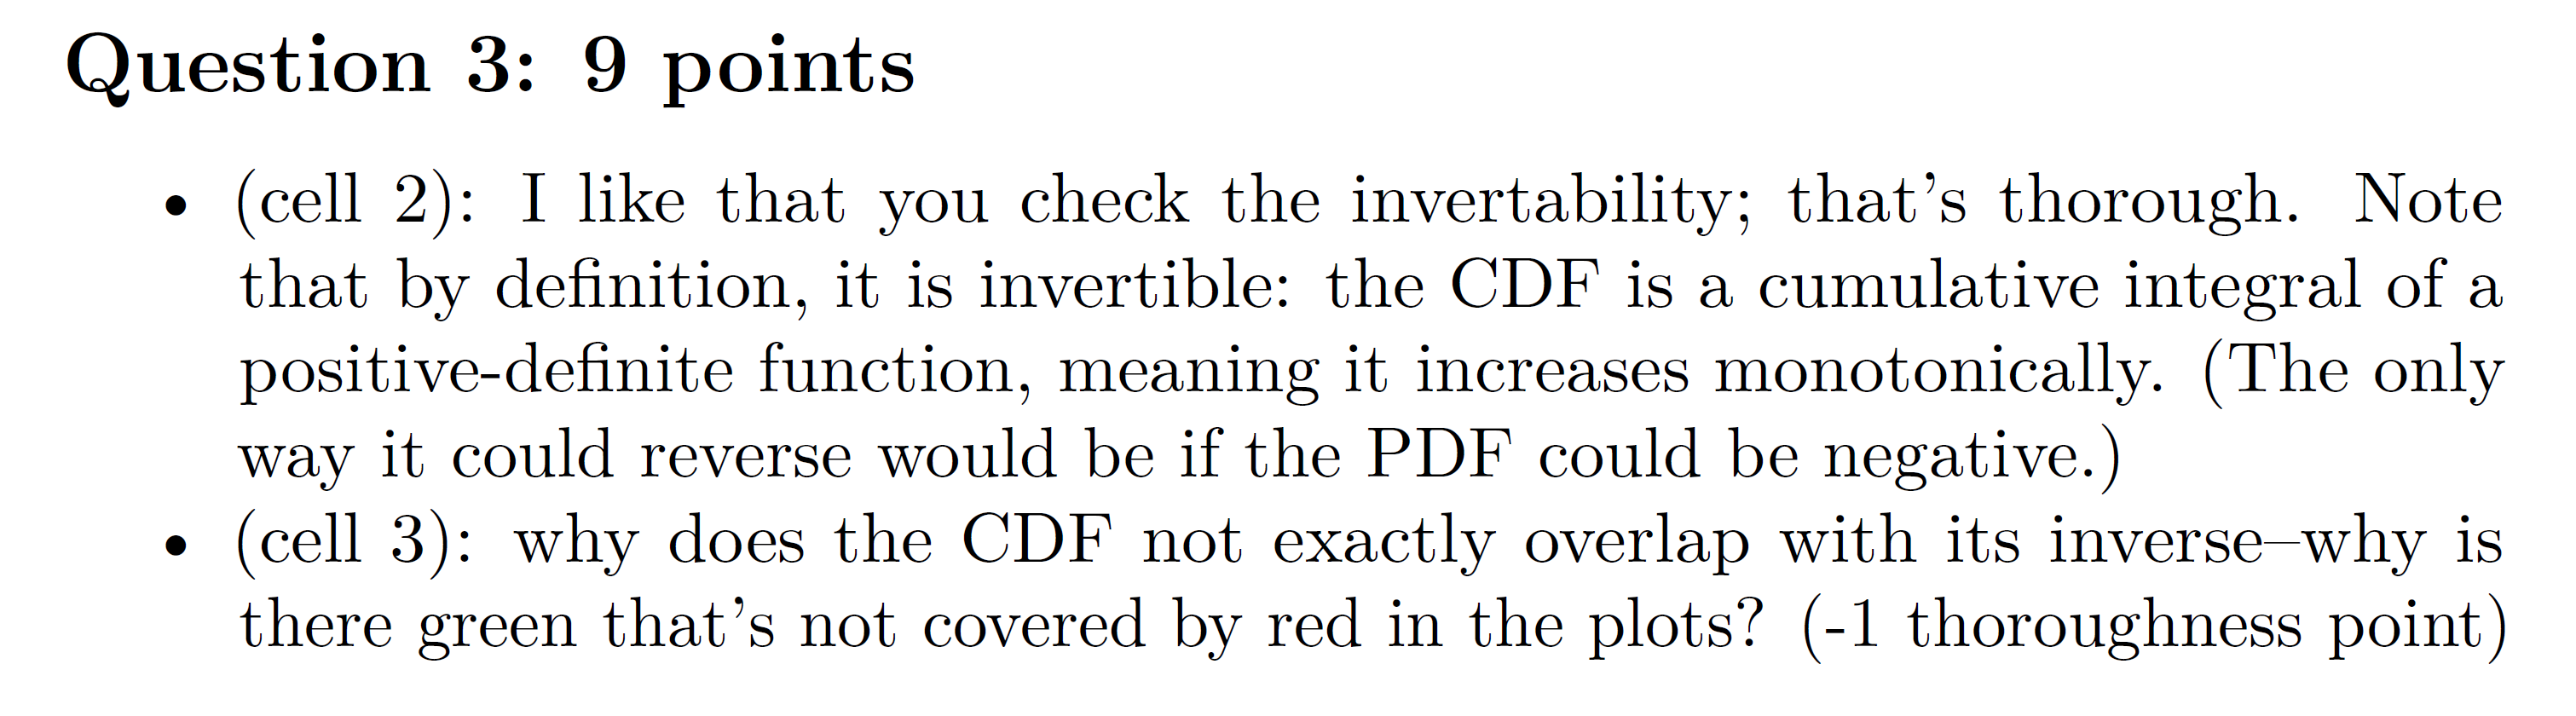

In [4]:
from IPython import display
display.Image("./q3.png")

<span style="color:crimson; font-size:1.5em"> **Corrections of this question :** </span>  <br />
* No modification of code (i.e., just correct Figure number as four more figures were added in the previous answer)
* Explanation of **Figure 8** and **Figure 10**: "Why does the CDF not exactly overlap with its inverse?" - The green line are not covered by red line in Figure 8 for x > 2 and in Figure 10 for x < -2 as it was out of support range of the CDF function (i.e., limited by $(\mu - \sigma)/\xi$, according to [1])

<span style="color:blue; ; font-size:1.2em"> **Invert the GEV CDF** </span>  <br />

From [1], we have the GEV CDF for standardized variable $s=(x-\mu )/\sigma$, with $\mu \in R$ and $\sigma > 0$, as 

$$
\mathrm{F}(s; \xi) = 
\begin{cases}
    exp(-exp(-s))             & \text{for } \xi = 0 & \text{(2.1)} \\
    exp(-(1+\xi s)^{-1/\xi})  & \text{for } \xi \neq 0 \text{ and } \xi s > -1 & \text{(2.2)} \\
    0                         & \text{for } \xi > 0 \text{ and } \xi s \le -1  & \text{(2.3)} \\
    1                         & \text{for } \xi < 0 \text{ and } \xi s \le -1  & \text{(2.4)}
\end{cases}
$$

From **Figure 1** of the example GEV CDFs, we have graphs of the CDF function.
We can apply the "Horizontal Line Test" (i.e., draw horizontal lines or constant $y-axis$ values) to determine if the function is one-to-one and thus has an inverse function.
**Figure 7** shows the "Horizontal Line Test" with purple horizontal lines.
As we can see, no horizontal line intersects the CDFs in more than one place for each CDF.
Hence, the GEV CDF is one-to-one and has an inverse function.

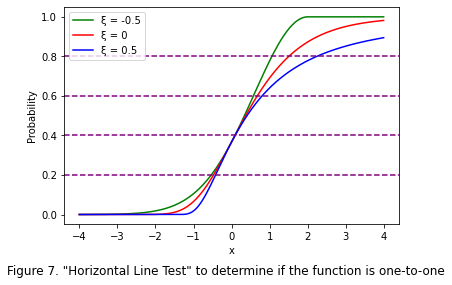

In [5]:
#
# "Horizontal Line Test" of GEV CDF
# to determine if the function is one-to-one
# and thus has an inverse function.
#
# X-array
x = np.arange(-4, 4, 0.01)
#
# Plot CDF with three values of xi : 
#
for i in np.arange(len(xi_r)) :
    # Get the CDF
    cdf = gev_functions.gev_cdf(x, mu, sigma, xi_r[i])
    lb = '\u03BE = '+str(xi_r[i])
    # Plotting
    plt.plot(x, cdf, c=colors[i], label=lb)   
# 
# Plot horizontal lines
#
plt.axhline(y=0.2, color='purple', linestyle='--')
plt.axhline(y=0.4, color='purple', linestyle='--')
plt.axhline(y=0.6, color='purple', linestyle='--')
plt.axhline(y=0.8, color='purple', linestyle='--')
#
# Decoration
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
caption='Figure 7. "Horizontal Line Test" to determine if the function is one-to-one'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

**a. Consider (2.1) when $\xi = 0$**

We have $p = F(s;\xi) = exp(-exp(-s))$ where $s=(x-\mu )/\sigma$.

Switch the $x$ and $p$ in the above function equation, we have

<p style="text-align: center;">
$x = exp(-exp(-( p -\mu )/\sigma ) )$ 
</p>

Now, solve for $p$, we have

<p style="text-align: center;">
$ln(x) = -exp(- ( p -\mu )/\sigma )$
</p>

or

<p style="text-align: center;">
$ln(-ln(x)) = - ( p -\mu )/\sigma $
</p>

or

<p style="text-align: center;">
$\sigma ln(-ln(x)) = - ( p -\mu ) $
</p>

or

<p style="text-align: center;">
$- \mu + \sigma ln(-ln(x)) = - p  $
</p>

or

<p style="text-align: center;">
$p = \mu - \sigma ln(-ln(x)) $
</p>

or, if you want to write as $log$ with the base $e$ is implicit [2], we have the quantile function for the GEV distribution in this first case (i.e. $\xi = 0$), is 
<p style="text-align: center;">
$x= Q(p;\mu,\sigma,\xi) = \mu - \sigma log(-log(p))$ &emsp;(2.5)
</p>
with $p \in (0,1)$ as the support of $x$ in this case is $(-\infty,+\infty)$

**b. Consider (2.2) when $\xi \neq 0$ and $p \in (0,1)$**

We have $p = F(s,\xi) = exp(-(1+\xi s)^{-1/\xi})$ where $s=(x-\mu )/\sigma$.

Switch the $x$ and $p$ in the above function equation, we have

<p style="text-align: center;">
$x = exp(-(1+\xi ((p-\mu )/\sigma))^{-1/\xi})$ 
</p>

Now, solve for $p$, we have

<p style="text-align: center;">
$ln(x) = -(1+\xi ((p-\mu )/\sigma))^{-1/\xi}$ 
</p>

or

<p style="text-align: center;">
$(-ln(x))^{-\xi} = 1+\xi ((p-\mu )/\sigma)$ 
</p>

or

<p style="text-align: center;">
$(-ln(x))^{-\xi} - 1 = \xi ((p-\mu )/\sigma)$ 
</p>

or

<p style="text-align: center;">
$((-ln(x))^{-\xi} - 1 )/\xi= (p - \mu )/\sigma$ 
</p>

or

<p style="text-align: center;">
$\sigma((-ln(x))^{-\xi} - 1 )/\xi= p - \mu $ 
</p>

or

<p style="text-align: center;">
$p = \sigma((-ln(x))^{-\xi} - 1 )/\xi + \mu $ 
</p>

or, again, or, if you want to write as $log$, we have the quantile function for the GEV distribution in this second case (i.e. $\xi \neq 0$ and $p \in (0,1)$), is 
<p style="text-align: center;">
    $x = Q(p;\mu,\sigma,\xi) = \mu + \frac{\sigma}{\xi} ((-log(p))^{-\xi} - 1 )$ &emsp;(2.6)
</p>

**c. Consider (2.3) and (2.4) as the lower-end point and upper-end point cases**

From (2.3), for $\xi > 0$ and $\xi s \le -1$, as $F(s;\xi) = 0$, we can easily get
<p style="text-align: center;">
$x = \mu - \frac{\sigma}{\xi}$ &emsp;(2.7)
</p>
for $p=0$

Similarly, from (2.4), for $\xi < 0$ and $\xi s \le -1$, we can have
<p style="text-align: center;">
$x = \mu - \frac{\sigma}{\xi}$ &emsp;(2.8)
</p>
for $p=1$.

This is basically dealing with support range of x as $x \in [\mu - \frac{\sigma}{\xi}, +\infty)$ when $\xi > 0$ and $x \in (-\infty, \mu - \frac{\sigma}{\xi}]$ when $\xi < 0$. 

**Combination (2.5)-(2.8), we have the quantile function of GEV CDF:**

$$
\mathrm{Q}(p;\mu,\sigma,\xi) = 
\begin{cases}
    \mu - \sigma log(-log(p))             & \text{for } \xi = 0 \text{ and } p \in (0,1)\\
    \mu + \frac{\sigma}{\xi} ((-log(p))^{-\xi} - 1 ) & \text{for } \xi \neq 0 \text{ and } p \in (0,1)  \\
    \mu - \frac{\sigma}{\xi}              & \text{for } \xi > 0 \text{ and } p = 0   \\
    \mu - \frac{\sigma}{\xi}              & \text{for } \xi < 0 \text{ and } p = 1  
\end{cases}
$$


<span style="color:blue; ; font-size:1.2em"> **Demonstrate that the solution is correct:** </span>  <br />

**Step 1:**

**We will verify that $f(x)$ and $f^{-1}(x)$ are inverse functions by:**

<span style="color:blue"> a. Show that $f[f^{-1}(x)] = x$ </span> 

* From (2.1) and (2.5), we have 

$F(x;\mu,\sigma,\xi) = exp(-exp(- ( \mu - \sigma log(-log(x))  -\mu)/\sigma )) =  exp(-exp(- (- \sigma log(-log(x)))/\sigma )) = exp(-exp(- ( -log(-log(x)) ) )) = exp(-exp(log(-log(x)))) = exp(-exp(log(-log(x)))) = exp(-(-log(x))) = exp(log(x)) = x$ q.e.d
    
* From (2.2) and (2.6), we have 

$F(x;\mu,\sigma,\xi) = exp(-(1+\xi (( \mu + \frac{\sigma}{\xi} ((-log(x))^{-\xi} - 1 ) - \mu)/\sigma ))^{-1/\xi}) = exp(-(1+\xi ( \frac{\sigma}{\xi} ((-log(x))^{-\xi} - 1 )/\sigma ))^{-1/\xi}) = exp(-(\xi ( \frac{\sigma}{\xi} ((-log(x))^{-\xi} )/\sigma ))^{-1/\xi}) = exp(-(\xi ( \frac{1}{\xi} ((-log(x))^{-\xi} ) ))^{-1/\xi}) = exp(-((-log(x))^{-\xi}  )^{-1/\xi}) = exp(-(-log(x)) = exp(log(x)) = x$ q.e.d


<span style="color:blue"> b. Show that $f^{-1}[f(x)] = x$ </span> 

* From (2.5) and (2.1), we have 

$Q(x;\mu,\sigma,\xi) = \mu - \sigma log(-log( exp(-exp(-( (x-\mu )/\sigma ))) )) = \mu - \sigma log(-(-exp(-( (x-\mu )/\sigma )) )) = \mu - \sigma log(exp(-( (x-\mu )/\sigma )) ) = \mu - \sigma (-( (x-\mu )/\sigma )) = \mu - (-( (x-\mu ) )) = \mu + x -\mu = x$ q.e.d

* From (2.6) and (2.2), we have 

$Q(x;\mu,\sigma,\xi) = \mu + \frac{\sigma}{\xi} ((-log( exp(-(1+\xi ((x-\mu )/\sigma))^{-1/\xi}) ))^{-\xi} - 1 ) = \mu + \frac{\sigma}{\xi} ((-(-(1+\xi ((x-\mu )/\sigma ))^{-1/\xi} ))^{-\xi} - 1 ) = \mu + \frac{\sigma}{\xi} (((1+\xi ((x-\mu )/\sigma ))^{-1/\xi} )^{-\xi} - 1 ) = \mu + \frac{\sigma}{\xi} ((1+\xi ((x-\mu )/\sigma )) - 1 ) = \mu + \frac{\sigma}{\xi} ( \xi ((x-\mu )/\sigma )) = \mu + \frac{1}{\xi} ( \xi (x-\mu))  = \mu + x-\mu = x$ q.e.d

**Step 2:**

<span style="color:blue"> c. Show that the domain and range have been reversed.  </span> <br />
This will be done by the written quantile function (i.e., see **gev_qf()** below) and its results shown in **Figure 8,9,10**.
In **Figure 8,9,10**, the values of GEV CDF is displayed by solid green line while the output of GEV QF is shown by dash red line, with three cases of shape parameters of -0.5, 0 and 0.5.
As can be seen, the dash red lines overlay solid green lines which means that the quantile function inverts successfully quantiles to x-value.

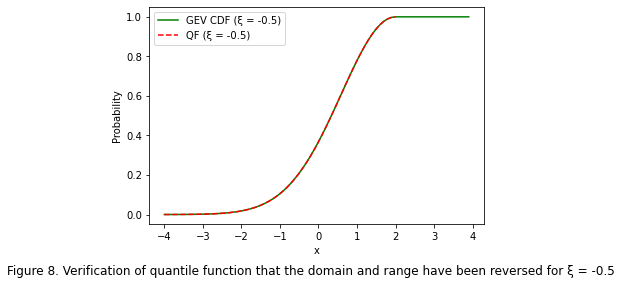

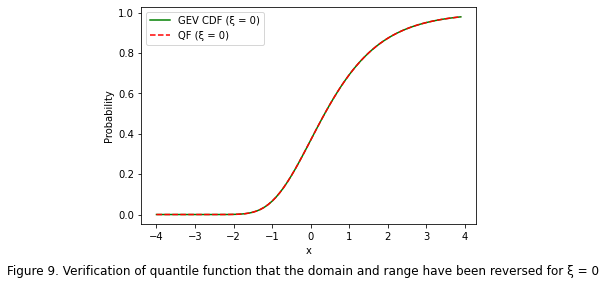

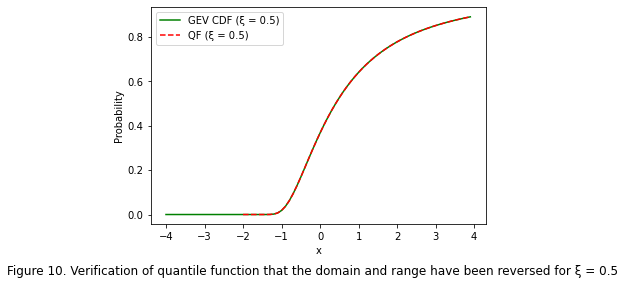

In [6]:
# A function for the GEV quantile function
# This function is moved to gev_functions.py

# A plotting function was here.
# Now, it is moved to gev_functions.py 

#
# Main part (i.e., plot GEV CDF and QF)
#            
if __name__=="__main__":

    # Some parameters
    mu = 0        # Location parameter
    sigma = 1     # Scale parameter
    xi_r = [-0.5,0,0.5]     # Shape parameter
    
    # X-array
    x = np.arange(-4, 4, 0.1)
    # If you want to test with your quantile array
    # q = np.arange(0, 1, 0.01)
    
    for i in np.arange(len(xi_r)) :
        # Get the CDF
        cdf = gev_functions.gev_cdf(x, mu, sigma, xi_r[i])
        cdflb = 'GEV CDF ('+'\u03BE = '+str(xi_r[i])+')'

        # Get the GF (inverting the "cdf" above)
        x_qf = gev_functions.gev_qf(cdf, mu, sigma, xi_r[i])
        qflb = 'QF ('+'\u03BE = '+str(xi_r[i])+')'
    
        # Plotting
        caption='Figure '+str(i+8)+'. Verification of quantile function that the domain and range have been reversed for \u03BE = '+str(xi_r[i])
        gev_functions.compare_cdf_qf(x,cdf,cdflb,x_qf,cdf,qflb,caption)

<span style="color:blue; font-size:1.5em"> **4. Implement non-stationary GEV PDF and CDF with time as a covariate** (10 points)  </span>  <br />
* Write three new functions that implement non-stationary GEV PDF, CDF, and the quantile function Q (solved for above). Assume that time t is the covariate, and use a non-stationary model that assume μ(t) = cμ ⋅ t + μ0 and that σ and ξ are constant. <br />

<span style="color:crimson; font-size:1.5em"> **Feedback from Prof. Travis O'Brien :** </span>  <br />

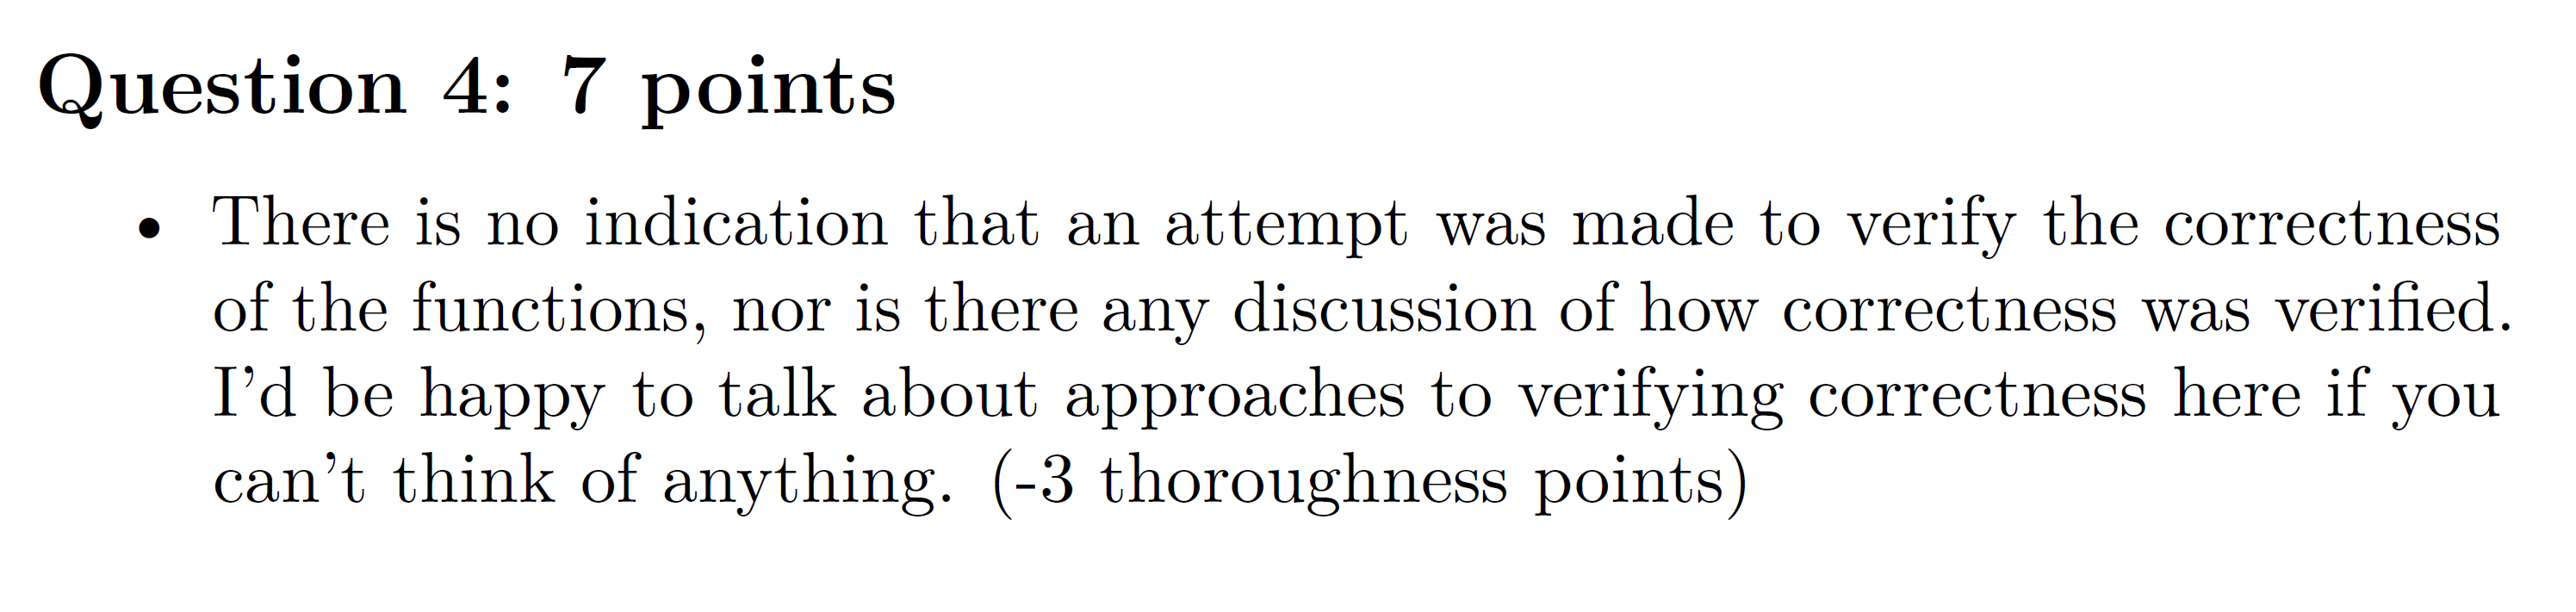

In [7]:
from IPython import display
display.Image("./q4.png")

<span style="color:crimson; font-size:1.5em"> **Corrections of this question :** </span>  <br />
* <span style="color:crimson; font-size:1.5em"> Cell #8 </span> : implementing "clever" idea from discussion on Friday 14 Oct 2022 at the office of Prof. Travis, calling stationary functions (i.e., gev_cdf, gev_pdf, gev_qf) inside the code of non-stationary functions (i.e., gev_ns_cdf, gev_ns_pdf, gev_ns_qf) for clearer reading of codes
* <span style="color:crimson; font-size:1.5em"> Cell #9 and the following markdown notes </span> : is what I tried **before** the discussion on Friday 14 Oct 2022 at the office of Prof. Travis.
    * I check the behavior of non-stationary functions by (1) 3D-view and (2) two points tests where it should match the stationary PDF
* <span style="color:crimson; font-size:1.5em"> Cell #10 , cell #11 and the following markdown notes </span> : is what I tried **after** the discussion on Friday 14 Oct 2022 at the office of Prof. Travis.
    * Capture a time slice output from non-stationary functions and compare with output from scipy.stats.genextreme
    * Calculate the "mode" from non-stationary PDFs functions and compare with the one computed by the formula on Wikipedia references

In [8]:
### Three functions in this box are moved to gev_functions.py ###
# A function for non-stationary GEV CDF
# A function for non-stationary GEV PDF
# A function for non-stationary GEV quantile function (QF) 

* Make some plots showing the effect of non-stationarity on the PDFs, CDFs, and quantile function Q. <br />
* Discuss the steps you took to verify that these functions are implemented correctly. <br />

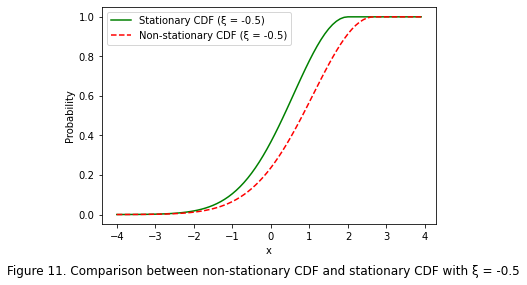

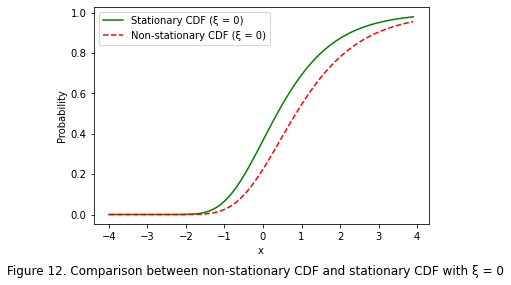

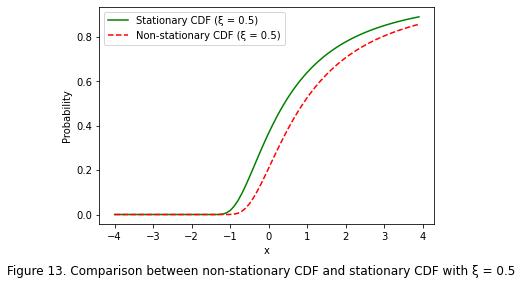

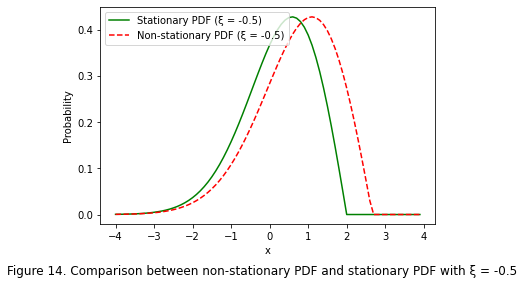

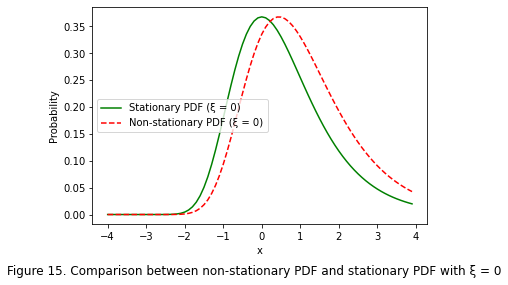

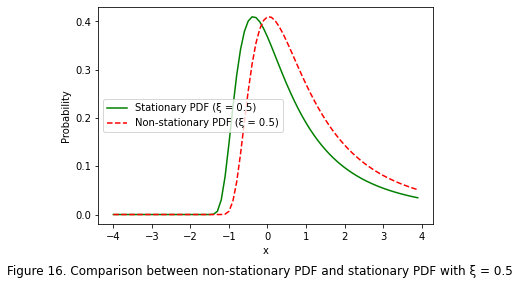

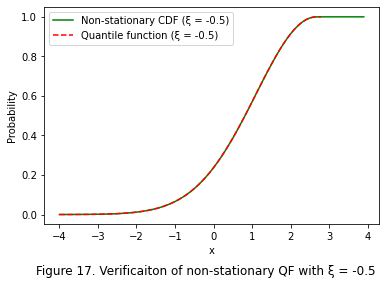

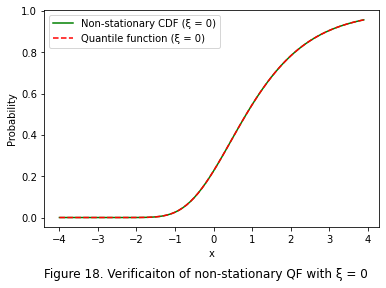

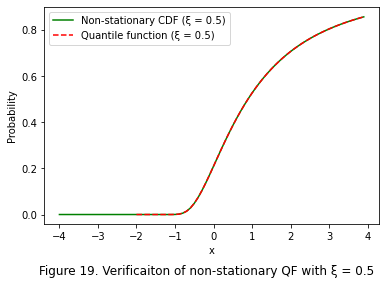

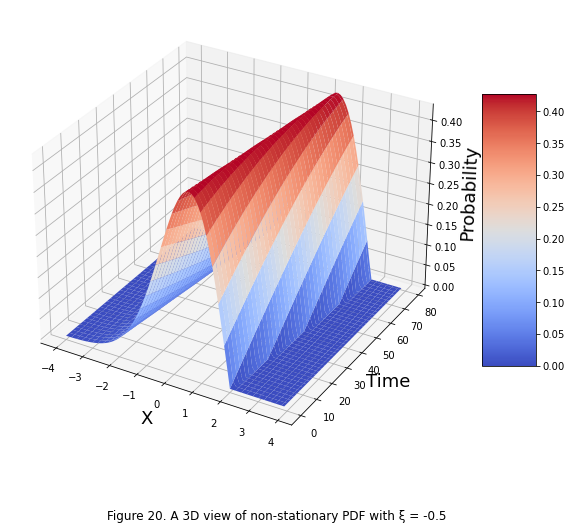

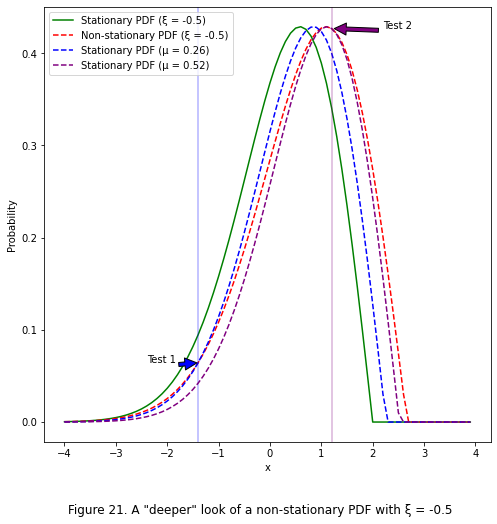

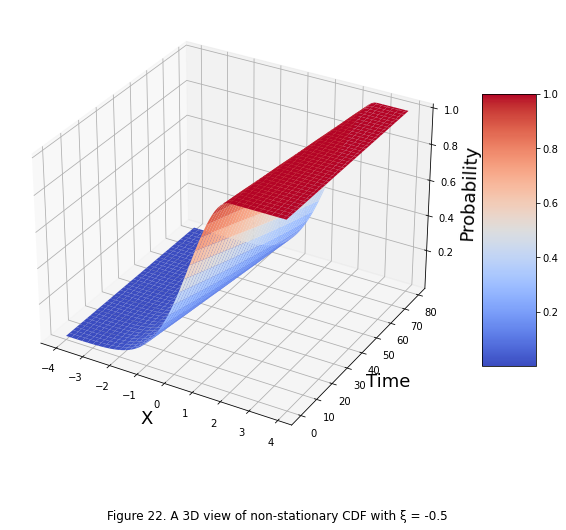

In [9]:
#
# For 3D plotting
#
from mpl_toolkits import mplot3d
from matplotlib import cm

# FOUR self-written functions were here.
# They are moved to gev_functions.py
# Including :
# 1. Another plotting function.
# 2. 3-D plotting of "non-stationary" PDFs
# 3. A plotting for "deeply" looking one case of PDF
# 4. 3-D plotting of "non-stationary" CDFs
    
#
# Main part (i.e., showing the effect of non-stationarity 
#                  on the PDFs, CDFs, and QFs )
#            
if __name__=="__main__":

    # Some parameters
    mu0 = 0        # Location parameter
    sigma = 1      # Scale parameter
    xi_r = [-0.5,0,0.5]      # Shape parameter
    cmu = 0.01     # Slope of μ(t) = cμ ⋅ t + μ0
    
    # X-array
    x = np.arange(-4, 4, 0.1)
    # Time array
    t = np.arange(len(x))
    
    #
    # Comparison of CDFs
    #
    for i in np.arange(len(xi_r)) :

        # Get the stationary CDF
        cdf_sta = gev_functions.gev_cdf(x, mu0, sigma, xi_r[i])
        lb1 = 'Stationary CDF ('+'\u03BE = '+str(xi_r[i])+')'

        # Get the non-stationary CDF
        cdf_non = gev_functions.gev_ns_cdf(x, t, cmu, mu0, sigma, xi_r[i]) 
        lb2 = 'Non-stationary CDF ('+'\u03BE = '+str(xi_r[i])+')'
        
        # Plotting
        caption='Figure '+str(i+11)+'. Comparison between non-stationary CDF and stationary CDF with \u03BE = '+str(xi_r[i])
        gev_functions.compare_cdf(x,cdf_sta,lb1,x,cdf_non,lb2,caption)
        
    #
    # Comparison of PDFs
    #
    for i in np.arange(len(xi_r)) :

        # Get the stationary PDF
        pdf_sta = gev_functions.gev_pdf(x, mu0, sigma, xi_r[i])
        lb1 = 'Stationary PDF ('+'\u03BE = '+str(xi_r[i])+')'

        # Get the non-stationary PDF
        pdf_non = gev_functions.gev_ns_pdf(x, t, cmu, mu0, sigma, xi_r[i]) 
        lb2 = 'Non-stationary PDF ('+'\u03BE = '+str(xi_r[i])+')'
        
        # Plotting
        caption='Figure '+str(i+14)+'. Comparison between non-stationary PDF and stationary PDF with \u03BE = '+str(xi_r[i])
        gev_functions.compare_cdf(x,pdf_sta,lb1,x,pdf_non,lb2,caption)
    
    #
    # Checking the non-stationary QF
    #
    for i in np.arange(len(xi_r)) :

        # Get the non-stationary CDF
        cdf_non = gev_functions.gev_ns_cdf(x, t, cmu, mu0, sigma, xi_r[i]) 
        lb1 = 'Non-stationary CDF ('+'\u03BE = '+str(xi_r[i])+')'
        
        # Get the non-stationary QF
        x_non = gev_functions.gev_ns_qf(cdf_non, t, cmu, mu0, sigma, xi_r[i]) 
        lb2 = 'Quantile function ('+'\u03BE = '+str(xi_r[i])+')'
        
        # Plotting
        caption='Figure '+str(i+17)+'. Verificaiton of non-stationary QF with \u03BE = '+str(xi_r[i])
        gev_functions.compare_cdf(x,cdf_non,lb1,x_non,cdf_non,lb2,caption)
    
    #
    # 3D-plot to visualize the idea of "changing" μ(t)
    #
    caption='Figure '+str(20)+'. A 3D view of non-stationary PDF with \u03BE = '+str(xi_r[0])
    gev_functions.pdf_3d_plot(x, t, cmu, mu0, sigma, xi_r[0], caption)
    
    #
    # Try to explain the difference between stationary and non-stationary PDF in one case
    #
    caption='Figure '+str(21)+'. A "deeper" look of a non-stationary PDF with \u03BE = '+str(xi_r[0])
    gev_functions.compare_pdf(x, t, cmu, mu0, sigma, xi_r[0], caption)
    
    #
    # 3D-plot to visualize the idea of non-stationary CDFs and cutting it with constant P surface
    #
    caption='Figure '+str(22)+'. A 3D view of non-stationary CDF with \u03BE = '+str(xi_r[0])
    gev_functions.cdf_3d_plot(x, t, cmu, mu0, sigma, xi_r[0], caption)

<span style="color:crimson; font-size:1.5em"> What I tried **before** the discussion on Friday 14 Oct 2022 at the office of Prof. Travis: </span>
 
**Figure 11-16** shows the effect of non-stationarity on the PDFs and CDFs with three values of shape parameters of -0.5,0 and 0.5.
In these figures, the stationary PDFs/CDFs are shown by solid green lines while the non-stationary PDFs/CDFs are displayed by dash red lines.
As the positive $c_{\mu}$ value of 0.01 was used in these tests, the values $\mu$ increases with time.
This leads to the "rightward-moving" of the non-stationary PDFs, as can be seen in **Figure 14-16**.
The results from non-stationary quantile function Q are also presented in **Figure 17-19** 
In Figure 17 and 19, the "uncovered" range is outside the "support" range (as seen and discussed in the case of stationary CDFs). 

According to the design of above Python scripts, the only main difference between non-stationary PDF/CDF functions (e.g., **gev_ns_pdf()**) and stationary PDF/CDF functions (e.g., **gev_pdf()**) is the adding of the line **"mu = ( cmu * t ) + mu0"** considering $\mu(t) = c_{\mu} t + \mu_{0}$.
One trivial way to verify the non-stationary PDF/CDF functions (e.g., **gev_ns_pdf()**) is setting the **cmu = 0** to see the non-stationary case become stationary case (not shown).

To further understanding the behavior of non-stationary GEV PDF function, **Figure 20** presents the idea of linear increasing location parameters and its effect on the PDFs surface (i.e., in the 3-D view).
As time increases, the PDFs tends to move to the right path of x-axis (i.e., higher upper-end point).
**Figure 21** shows the two "tested-points" (i.e., Test 1 and Test 2) to see verify the **gev_ns_pdf()**.
The non-stationary GEV PDFs (i.e., dash red line) intersects the stationary GEV PDFs (i.e., blue and purple dash lines) at exactly points of same $\mu$ values (i.e., 0.26 and 0.53, respectively).

Above all, further "smarter and more comprehensive" methods to verify these non-stationary GEV PDF/CDF functions are still required.
**Figure 22** shows the 3-D view of non-stationary GEV CDFs functions.
Interestingly, if we cut this 3-D surface with a flat surface of constant probability value (e.g., p=0.5), we will have line of increase x-value with time.
This type of "increasing-in-value" quantile line can be seen in the part 3 of the answer to the next question. 

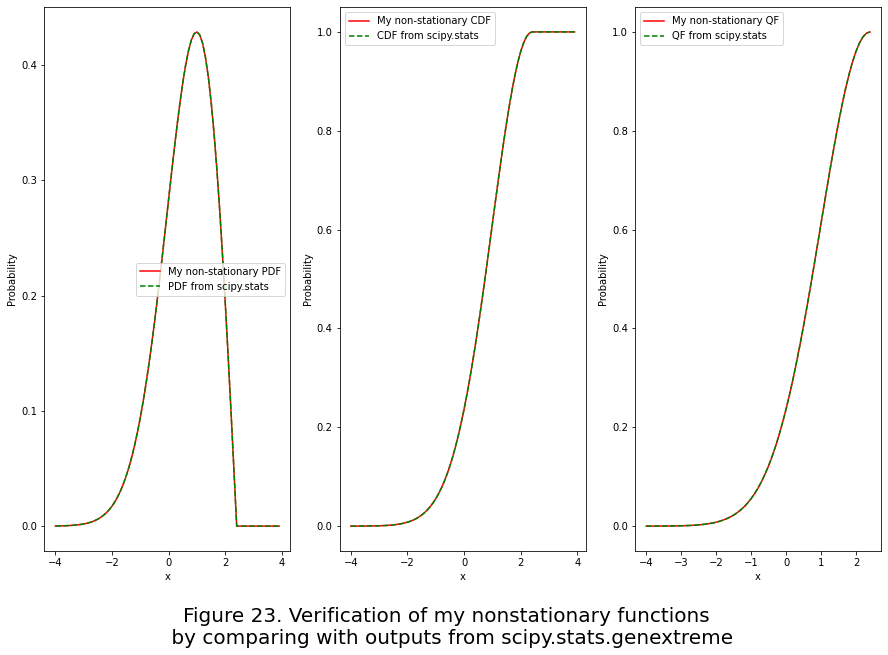

In [10]:
#
# Verification of non-stationary functions (i.e., PDF, CDF, QF)
#
# 4.a Compare with output from scipy.stats.genextreme for a time slice
#
if __name__=="__main__":
    
    # Some parameters
    mu0 = 0        # Location parameter
    sigma = 1      # Scale parameter
    xi_r = [-0.5,0,0.5]      # Shape parameter
    cmu = 0.01     # Slope of μ(t) = cμ ⋅ t + μ0
    
    # X-array
    x = np.arange(-4, 4, 0.1)
    # Time array
    t = np.arange(len(x))
    
    # Time slice for test (e.g., in the middle of life-time, why not)
    t_slice = int(len(x))/2
    
    # Get the non-stationary PDF, CDF, QF from my function
    pdf_non = gev_functions.gev_ns_pdf(x, t_slice, cmu, mu0, sigma, xi_r[0]) 
    cdf_non = gev_functions.gev_ns_cdf(x, t_slice, cmu, mu0, sigma, xi_r[0]) 
    qf_non = gev_functions.gev_ns_qf(cdf_non, t_slice, cmu, mu0, sigma, xi_r[0]) 
    
        
    # Get the PDF using scipy.stats.genextreme
    mu = cmu * t_slice + mu0
    pdf_scipy = genextreme.pdf(x, -1*xi_r[0], loc=mu, scale=sigma)
    cdf_scipy = genextreme.cdf(x, -1*xi_r[0], loc=mu, scale=sigma)
    qf_scipy = genextreme.ppf(cdf_scipy, -1*xi_r[0], loc=mu, scale=sigma)
    
    # Plot PDFs, CDFs, QFs to validate
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))
    
    # To see the match between PDFs
    ax1.plot(x, pdf_non, c='red', linestyle='-', label='My non-stationary PDF')
    ax1.plot(x, pdf_scipy, c='green', linestyle='--', label='PDF from scipy.stats')
    ax1.legend()
    ax1.set_xlabel('x')
    ax1.set_ylabel('Probability')
    
    # To see the match between CDFs
    ax2.plot(x, cdf_non, c='red', linestyle='-', label='My non-stationary CDF')
    ax2.plot(x, cdf_scipy, c='green', linestyle='--', label='CDF from scipy.stats')
    ax2.legend()
    ax2.set_xlabel('x')
    ax2.set_ylabel('Probability')
    
    # To see the match between QFs
    ax3.plot(qf_non, cdf_non, c='red', linestyle='-', label='My non-stationary QF')
    ax3.plot(qf_scipy, cdf_scipy, c='green', linestyle='--', label='QF from scipy.stats')
    ax3.legend()
    ax3.set_xlabel('x')
    ax3.set_ylabel('Probability')
    
    # Caption
    plt.figtext(0.5, 0.0, 'Figure 23. Verification of my nonstationary functions \n by comparing with outputs from scipy.stats.genextreme', wrap=True, horizontalalignment='center', fontsize=20)
    plt.show() 

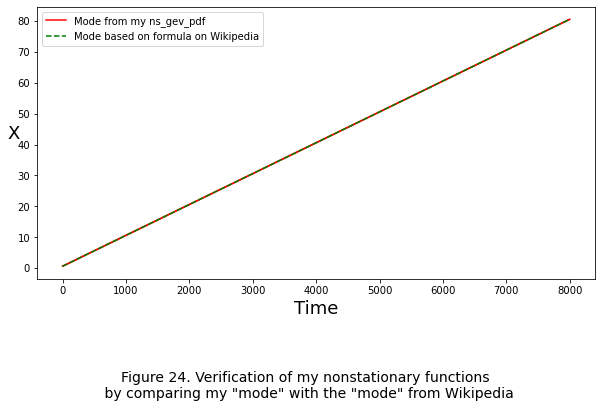

In [11]:
#
# Verification of non-stationary functions (i.e., PDF, CDF, QF)
#
# 4.b Check the "mode" of non-stationary PDFs 
#
if __name__=="__main__":
    
    # Some parameters
    mu0 = 0        # Location parameter
    sigma = 1      # Scale parameter
    xi_r = [-0.5,0,0.5]      # Shape parameter
    cmu = 0.01     # Slope of μ(t) = cμ ⋅ t + μ0
    
    # X-array
    x = np.arange(-400, 400, 0.1)
    # Time array
    t = np.arange(len(x))

    # Get the mode using my non-stationary GEV PDF functions
    mode = []
    for i in np.arange(len(t)) :
        pdf = gev_functions.gev_ns_pdf(x, t[i], cmu, mu0, sigma, xi_r[0])
        mode.append(x[np.argmax(pdf)])
    
    # Get the mode from the formula in Wikipedia reference [1]
    # Here: https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution
    # With xi_r[0] < 0
    mode_wiki = []
    a = ((( 1 + xi_r[0] ) ** (-1 * xi_r[0])) - 1 ) / xi_r[0]
    for i in np.arange(len(t)) :
        mode_wiki.append((cmu * t[i] + mu0) + (sigma * a))
    
    # Plot figure to check if mode == mode_wiki
    fig = plt.figure(figsize=(10,5))
    plt.plot(t,mode, c='r', linestyle='-', label='Mode from my ns_gev_pdf')
    plt.plot(t,mode_wiki, c='g', linestyle='--', label='Mode based on formula on Wikipedia')

    # Decoration
    plt.xlabel('Time', fontsize=18, rotation = 0)
    plt.ylabel('X', fontsize=18, rotation = 0)
    plt.legend() 
    
    # Caption
    plt.figtext(0.5, -0.2, 'Figure 24. Verification of my nonstationary functions \n by comparing my "mode" with the "mode" from Wikipedia', wrap=True, horizontalalignment='center', fontsize=14)
    plt.show() 

<span style="color:crimson; font-size:1.5em"> What I tried **after** the discussion on Friday 14 Oct 2022 at the office of Prof. Travis: </span>

**Figure 23** shows that, for all three non-stationary GEV functions for PDF, CDF, and QF, for a tested time slice (i.e., in this case, just take the middle time step of time series), the output of my functions is perfectly matched with the output from scipy.stats.genextreme (i.e., there is no difference between solid red line and dash green line).

**Figure 24** shows that the "mode" calculated from my **gev_ns_pdf()** has the same value as the mode calculated by the formula from Wikipedia reference (i.e., there is no difference between solid red line and dash green line).

<span style="color:blue; font-size:1.5em"> **5. χ-by-eye: Estimate non-stationary GEV parameters for Risser et al. data** (10 points)  </span>  <br />
* Load and plot the CSV data in /home/data/Risser2019_Figure1.csv (the first column is year, the second column is Rx7day [mm]; there is a header row). Also plot a PDF of the Rx7day values. <br />

<span style="color:crimson; font-size:1.5em"> **Feedback from Prof. Travis O'Brien :** </span>  <br />

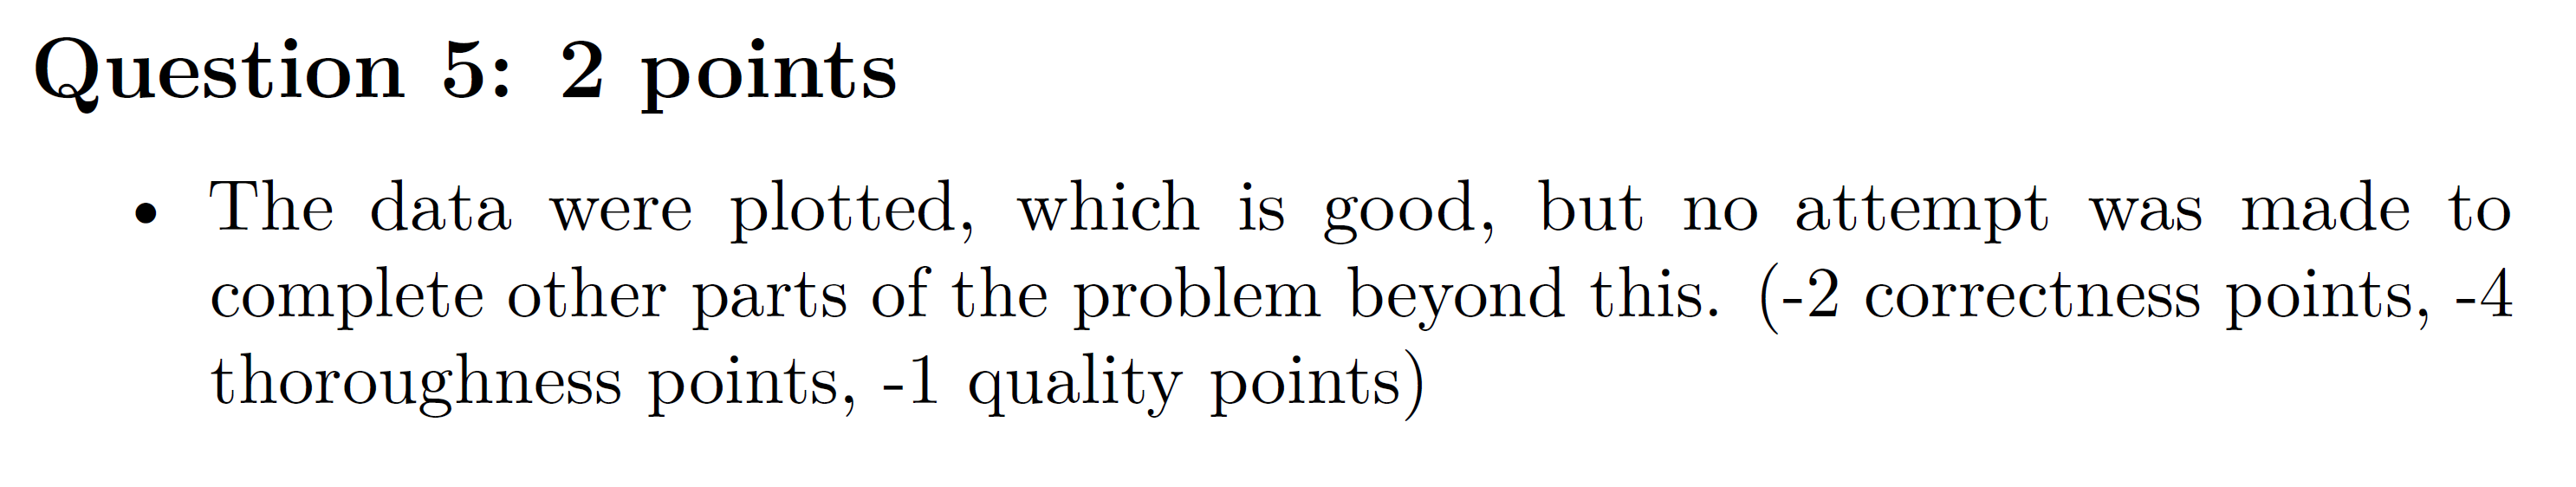

In [12]:
from IPython import display
display.Image("./q5.png")

<span style="color:crimson; font-size:1.5em"> **Corrections of this question :** </span>  <br />
* Can be found in **cell #14-17**: I made attempt to complete other parts of the problem.

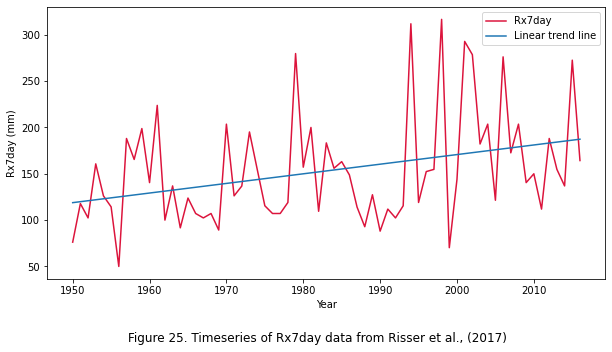

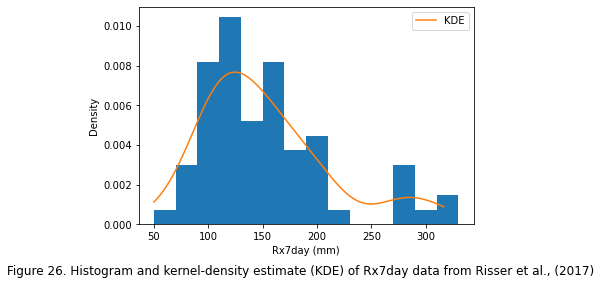

In [13]:
# Use csv reader from pandas
import pandas as pd

# For add the KDE to plot
from scipy import stats

# Load Risser et al., (2017) data
df = pd.read_csv('/home/data/Risser2019_Figure1.csv',header=0)

# Get #Year and #Rx7day as time (t) and variable (x)
t = df['# Year'].values
x = df[' Rx7day'].values
#t = np.arange(len(x))

# Try simple linear trendline
z = np.polyfit(t, x, 1)
p = np.poly1d(z)

# Try to add KDE
kde = stats.gaussian_kde(x)
xx = np.linspace(np.nanmin(x), np.nanmax(x), 1000)

# Plot the CSV data
plt.figure (figsize=(10,5))
plt.plot(t, x, color='crimson',label='Rx7day')
# Add trendline to plot
plt.plot(t, p(t),label='Linear trend line')
# Decoration
plt.xlabel('Year')
plt.ylabel('Rx7day (mm)')
plt.legend()
caption='Figure 25. Timeseries of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

# Plot a PDF of the Rx7day values
mybins=np.arange(50,340,20)
plt.hist(x, density=True, bins=mybins)
plt.plot(xx, kde(xx), label="KDE")
plt.ylabel('Density')
plt.xlabel('Rx7day (mm)')
plt.legend()
caption='Figure 26. Histogram and kernel-density estimate (KDE) of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

* Start with the assumption that cμ = 0; guesstimate the values of μ0, σ, and ξ that approximately correspond to the data loaded above. A good starting point might be using the mean for μ0 and the standard deviation for σ. You’ll need to manually adjust the values to get this to work though. (Note: you should not do any optimization or fitting at this step. You will get no credit for this problem if you do.)

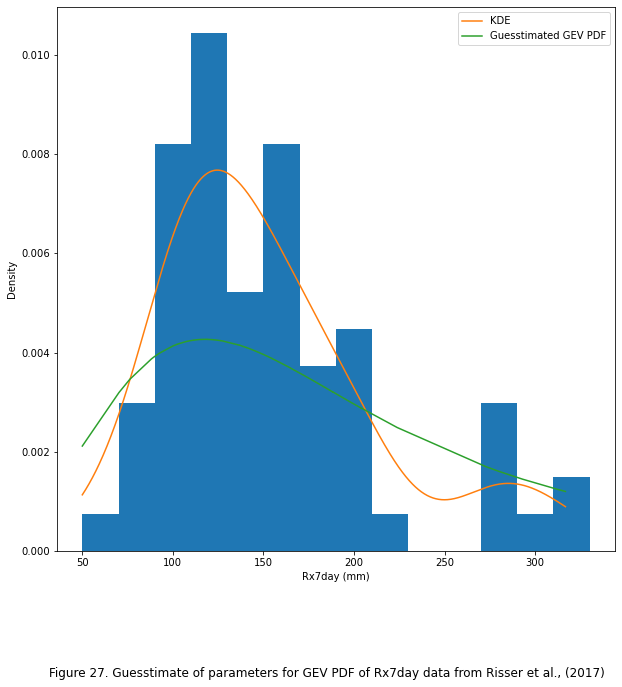

In [14]:
# Guesstimate
cmu = 0.002             # Start with this assumption
mu0 = np.nanmean(x)-20   # Using the mean
sigma = np.nanstd(x)*1.5  # Using the standard deviation
xi = 0.25
#

# Note down what I "manually" adjust:
# xi = 0.5 : P too high ~0.04
# xi = 0.01 : the mode still too high
# xi = 0.001 : no, this approach is not good
# For fun xi = 0.9, 0.05, 2.0, ... doesn't work
# xi = 1000 : see the peak of pdf is reasonable now (0.012)
# Now play with scale parameter
# sigma = np.nanstd(x) : *2, *5,...
# I should reduce the mu0 = 100 -> test a number of mu0: I get lost !
# Wait !
# Scale parameter should be larger ? 
# But P become larger => let's try xi = 0
# Oh ! seems good !
# mu0/100 -> interesting change the shape ???
# Density !!! 
# Now test xi = 0, -0.5, 0.5 => 0.5 => 0.25
# Then try to change sigma and mu

#print (mu0)
#print (sigma)
#cmu = 0.055
#mu0 = 130
#sigma = 50
#xi = 0.3

#cmu = 0.0
#mu0 = 153
#sigma = 59
#xi = 0.006

# Using the written function to have estimated PDF
pdf_risser = gev_functions.gev_ns_pdf(x, t, cmu, mu0, sigma, xi) 

# Sort "pdf" for visulizations
pdf_sorted = [x for _,x in sorted(zip(x, pdf_risser))]
x_s = np.sort(x)

# Now plot it :
# Plot a PDF of the Rx7day values
mybins=np.arange(50,340,20) # Based on min/max of x
plt.figure (figsize=(10,10))
plt.hist(x, density=True, bins=mybins)
plt.plot(xx, kde(xx), label="KDE")
plt.plot(x_s, pdf_sorted, label="Guesstimated GEV PDF")

plt.ylabel('Density')
plt.xlabel('Rx7day (mm)')
plt.legend()
caption='Figure 27. Guesstimate of parameters for GEV PDF of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

After many "manual" trying, **Figure 27** presents the non-stationary GEV PDF with $c_{\mu} = 0.002$, $\mu_{0} \approx 133.09$, $\sigma \approx 88.74$ and $\xi = 0.25$.
It's a **very bad** estimate but I need to move the next questions due to time limit.

* Plot time vs Rx7day along with time t vs Q(q, t | cμ, μ0, σ, ξ) for q = 0.1, q = 0.5, and q = 0.9 (i.e., plot a timeseries of the quantiles using cμ and the values of μ0, σ, and ξ determined above.)

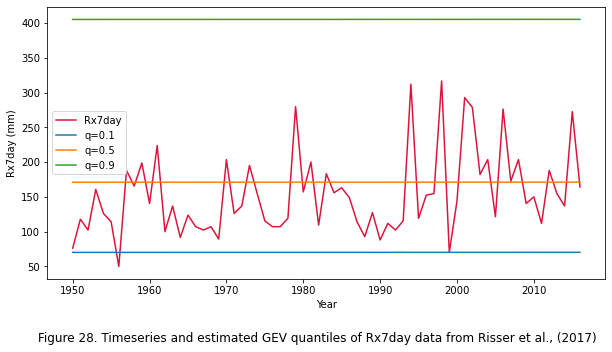

In [15]:
# Get quantiles
q=np.full(len(x),0.1)
q_1=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)
q=np.full(len(x),0.5)
q_5=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)
q=np.full(len(x),0.9)
q_9=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)

# Plot
plt.figure (figsize=(10,5))
plt.plot(t, x, color='crimson',label='Rx7day')
# Add quantiles
plt.plot(t, q_1,label='q=0.1')
plt.plot(t, q_5,label='q=0.5')
plt.plot(t, q_9,label='q=0.9')
# Decoration
plt.xlabel('Year')
plt.ylabel('Rx7day (mm)')
plt.legend()
caption='Figure 28. Timeseries and estimated GEV quantiles of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

* Generate a new plot similar to the above, but adjust cμ until your quantile functions above approximately go through the data. You may need to adjust the other parameters to get this to work well.

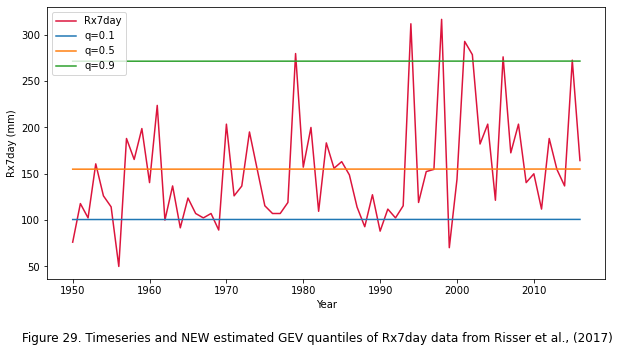

In [16]:
# I won't note down the adjust process as it's long !
cmu = 0.002             # Start with this assumption
mu0 = np.nanmean(x)-20   # Using the mean
sigma = np.nanstd(x)*0.8  # Using the standard deviation
xi = 0.2

# Get quantiles
q=np.full(len(x),0.1)
q_1=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)
q=np.full(len(x),0.5)
q_5=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)
q=np.full(len(x),0.9)
q_9=gev_functions.gev_ns_qf(q, t, cmu, mu0, sigma, xi)

# Plot
plt.figure (figsize=(10,5))
plt.plot(t, x, color='crimson',label='Rx7day')
# Add quantiles
plt.plot(t, q_1,label='q=0.1')
plt.plot(t, q_5,label='q=0.5')
plt.plot(t, q_9,label='q=0.9')
# Decoration
plt.xlabel('Year')
plt.ylabel('Rx7day (mm)')
plt.legend()
caption='Figure 29. Timeseries and NEW estimated GEV quantiles of Rx7day data from Risser et al., (2017)'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

* Calculate the percentage change in μ(t) between 1950 and 2017. How does this compare to the values reported in Table 1 of Risser et al., and why might it differ?

In [17]:
# Percentage change in μ(t)
mu = ( cmu * t ) + mu0
pc = 100*(mu[-1]-mu[0])/mu[0]
print ("Percentage change of μ(t) = ",pc)

Percentage change of μ(t) =  0.09635718838353662


The percentage of change of $\mu_{t}$ is about 0.1 %.
Firstly, the model M2 that used and presented in Risser et al., (2017) considered the location parameter depends linearly on $ln(CO_{2})$ and Niño3.4 and the log of the scale parameter depends linearly on $ln(CO_{2})$.
In the simple model that we used in this exercise, only location paramater depends linearly on time.
Secondly, the "manual" estimated parameters (above) are not good one.
If we test the Goodness-of-Fit (e.g., Kolmogorov-Smirnov, or Anderson-Darling), the estimated parameters should not be used.
Finally, the value in Table 1 of Risser et al., (2017) considered the comparison of "return period" not the $\mu$. So, should we compare our results with these values in Table 1. (Maybe I misunderstood the requirements of this exercise or the information from Risser et al., (2017)).

<span style="color:blue; font-size:1.5em"> **6. Maximum likelihood** (+20 extra credit)  </span>  <br />
* Use an automated method to find maximum likelihood estimates of cμ, μ0, σ, and ξ (e.g., gradient descent). Discuss how these estimates compare with your manual estimates above. <br />

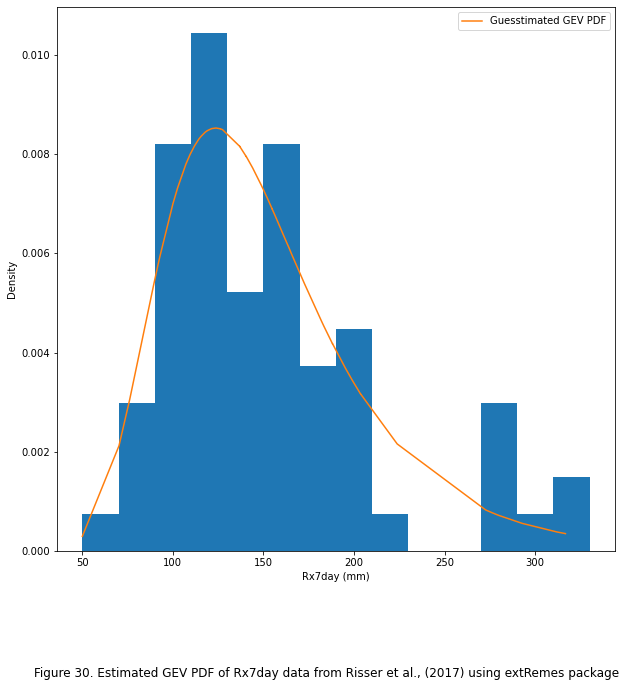

In [18]:
#
# Result from /G574-homework2/05Oct2022_Supplementary_R_script.r
#
mu0=1.241510e+02
cmu=8.491746e-04
sigma=4.317655e+01
xi=5.290594e-02
#
#mu0=102.74873799
#cmu=0.70976218
#sigma=40.56067295
#xi=0.06345728
#
# Using the written function to have estimated PDF
pdf_risser = gev_functions.gev_ns_pdf(x, t, cmu, mu0, sigma, xi) 

# Sort "pdf" for visulizations
pdf_sorted = [x for _,x in sorted(zip(x, pdf_risser))]
x_s = np.sort(x)

# Now plot it :
# Plot a PDF of the Rx7day values
mybins=np.arange(50,340,20) # Based on min/max of x
plt.figure (figsize=(10,10))
plt.hist(x, density=True, bins=mybins)
#plt.plot(xx, kde(xx), label="KDE")
plt.plot(x_s, pdf_sorted, label="Guesstimated GEV PDF")
plt.ylabel('Density')
plt.xlabel('Rx7day (mm)')
plt.legend()
caption='Figure 30. Estimated GEV PDF of Rx7day data from Risser et al., (2017) using extRemes package'
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

As I cannot write a python script now to use gradient descent algorithm to find maximum likelihood estimates of $c_{\mu}$, $\mu_{0}$, $\sigma$ and $\xi$, but I really want to find out which values that these parameters should be.
Therefore, I use the R package "extRemes" from Gilleland & Katz (2016) to estimate these parameters.
Please see the file /G574-homework2/05Oct2022_Supplementary_R_script.r for this implementation.
The estimated values are $c_{\mu} = 8.491746e-04$, $\mu_{0} = 1.241510e+02$, $\sigma = 4.317655e+01 $ and $\xi = 5.290594e-02$.
**Figure 30** shows the GEV PDFs with these estimated parameters.
In comparison to my manual estimates of $c_{\mu} = 0.002$, $\mu_{0} \approx 133.09$, $\sigma \approx 88.74$ and $\xi = 0.25$, the automated estimate of scale parameter is half lower and the $\xi$ value is much smaller.
The values of $\mu_{0}$ and $c_{\mu}$ are more less the same order.

<span style="color:crimson"> References  </span>  <br />
1. https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution
2. https://en.wikipedia.org/wiki/Natural_logarithm
3. Gilleland, E., & Katz, R. W. (2016). extRemes 2.0: An Extreme Value Analysis Package in R. Journal of Statistical Software, 72(8), 1–39. https://doi.org/10.18637/jss.v072.i08